### Importing  libraries

In [1]:
#Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#set style of grid
sns.set_style(style='whitegrid')
#ignore warnings
import warnings
warnings.simplefilter('ignore')

# Understanding the data


In [2]:
#read dataset 
Churn=pd.read_csv('Churn.csv')
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn contains 21 columns,7043 rows and 18 categorical columns.

In [4]:
Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Missing Values

In [5]:
Churn[Churn['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


11 rows of TotalCharges consist of whitespaces.Since 11 rows is only 0.15% of the Churn data we can go ahead and drop them.

In [6]:
#replace whitespaces with NaN
Churn['TotalCharges']=Churn['TotalCharges'].replace(" ",np.nan)

In [7]:
#drop all NaN values
Churn = Churn[Churn["TotalCharges"].notnull()]


In [8]:
#convert to float type
Churn["TotalCharges"] = Churn["TotalCharges"].astype(float)

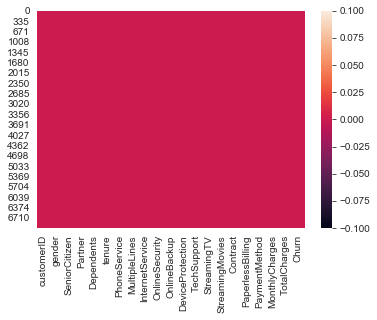

In [9]:
sns.heatmap(Churn.isnull())

No Null values present

### Data Manipulation

In [10]:
#mapping No to 0 and Yes to 1
Churn['Churn']=Churn['Churn'].map({'No':0,'Yes':1})

In [11]:
print('Max tenure',Churn['tenure'].max())
print('Min tenure',Churn['tenure'].min())

Max tenure 72
Min tenure 1


Grouping the tenure data into years will help us better visualize the data.Further storing this data as a column

In [12]:
def Tenure_in_yrs(x):
    if(x>0 and x<=12):
        return '0-1 yr'
    elif(x>12 and x<=24):
        return'1-2 yr'
    elif(x>24 and x<=36):
        return '2-3 yr'
    elif(x>36 and x<=48):
        return'3-4 yr'
    elif(x>48 and x<=60):
        return'4-5 yr'
    elif(x>60 and x<=72):
        return'5-6 yr'


In [13]:
Churn['Tenure_in_yrs']=Churn['tenure'].apply(Tenure_in_yrs)

In [14]:
Churn['Tenure_in_yrs'].value_counts()

0-1 yr    2175
5-6 yr    1407
1-2 yr    1024
4-5 yr     832
2-3 yr     832
3-4 yr     762
Name: Tenure_in_yrs, dtype: int64

### Data Visualization

Visualizing how balanced Churn Dataset is

[]

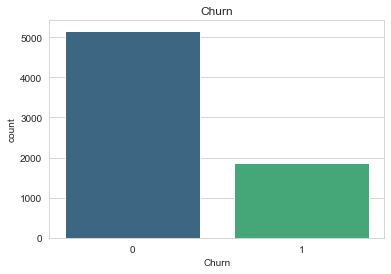

In [15]:
sns.countplot(Churn['Churn'],palette='viridis')
plt.title('Churn')
plt.plot()

The Number of people churned is very less compared to the number of people not churned.This shows that Churn dataset is imbalanced.Techniques like SMOTE and class weights should  be used inorder to prevent the model to predict the most frequent class not churn

Gender Distribution in Customer attrition

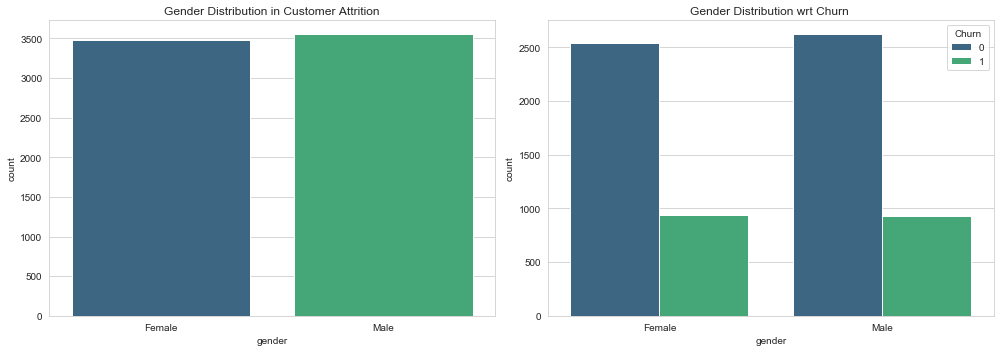

In [16]:
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.countplot(Churn['gender'],ax=ax1,palette='viridis')
ax1.title.set_text('Gender Distribution in Customer Attrition')
sns.countplot(Churn['gender'],hue=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('Gender Distribution wrt Churn ')
plt.tight_layout()
plt.show()

Thus the number of male and female customers are almost equal.Also gender doesn't show a significant influence in deciding whether a customer will churn or not.Thus gender should not be given much importance by the company while deciding about customer attrition

Senior Citizens Distribution in Customer attrition

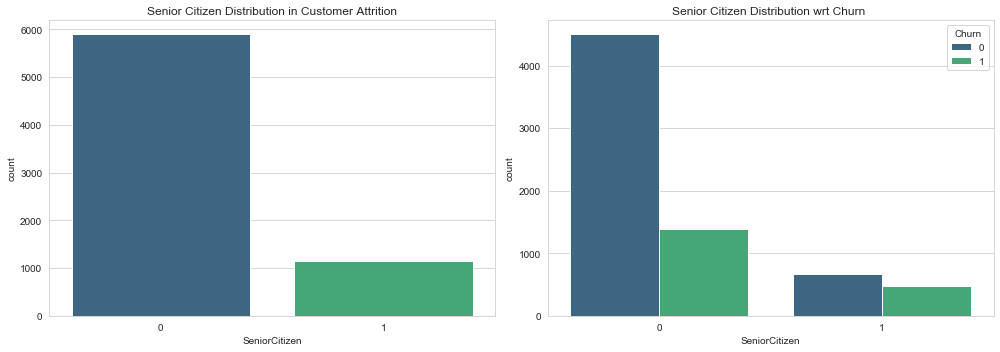

In [17]:
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.countplot(Churn['SeniorCitizen'],ax=ax1,palette='viridis')
ax1.title.set_text('Senior Citizen Distribution in Customer Attrition')
sns.countplot(Churn['SeniorCitizen'],hue=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('Senior Citizen Distribution wrt Churn ')
plt.tight_layout()
plt.show()


There are very few  customers who are senior citizens. Thus most of our customers in the data are younger.Also Senior citizens churn more than Younger customers.
So one of the primary focus of the company should be to convince the senior citizen customers to continue  with the services of the company

Dependents Distribution in Customer attrition

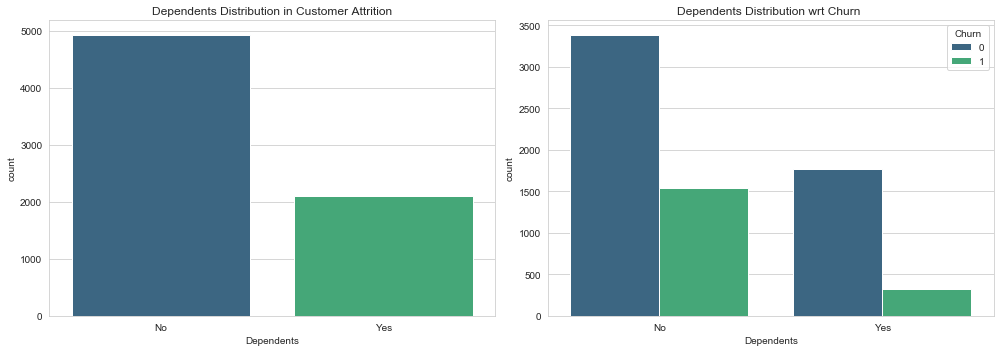

In [18]:
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.countplot(Churn['Dependents'],ax=ax1,palette='viridis')
ax1.title.set_text('Dependents Distribution in Customer Attrition')
sns.countplot(Churn['Dependents'],hue=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('Dependents Distribution wrt Churn ')
plt.tight_layout()
plt.show()

Thus fewer customers have dependents.Customers having dependents have very low churn rate compared to customers not having dependents

Partners Distribution in Customer attrition

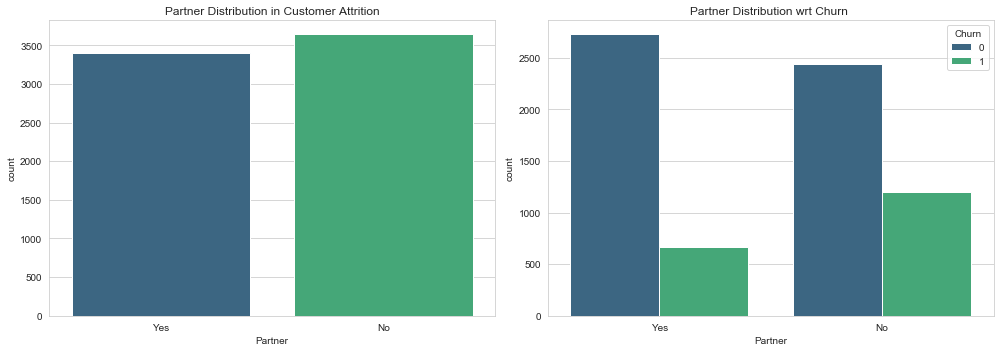

In [19]:
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.countplot(Churn['Partner'],ax=ax1,palette='viridis')
ax1.title.set_text('Partner Distribution in Customer Attrition')
sns.countplot(Churn['Partner'],hue=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('Partner Distribution wrt Churn ')
plt.tight_layout()
plt.show()


Thus customers having partners are almost equal in count to those not having partners.Also customers not having partners tend to churn more.Thus company must try to improve their services so that they suite the needs of customers which donot have partners

Tenure Distribution in Customer attrition

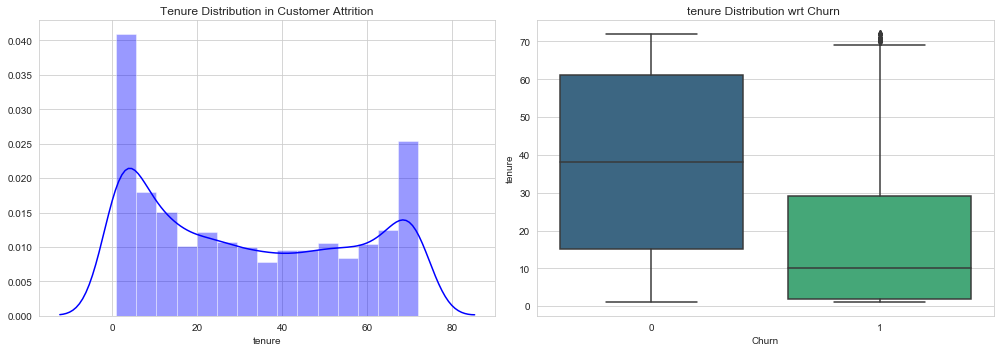

In [20]:
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.distplot(Churn['tenure'],ax=ax1,color='blue')
ax1.title.set_text('Tenure Distribution in Customer Attrition')
sns.boxplot(y=Churn['tenure'],x=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('tenure Distribution wrt Churn ')

plt.tight_layout()
plt.show()


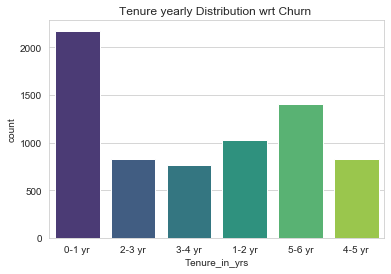

In [21]:
sns.countplot(x='Tenure_in_yrs',data=Churn,palette='viridis')
plt.title('Tenure yearly Distribution wrt Churn ')
plt.show()

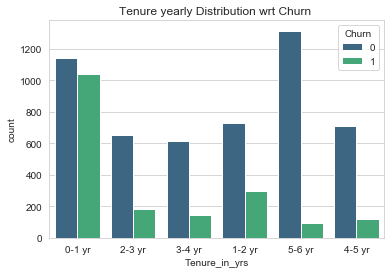

In [22]:
sns.countplot(x='Tenure_in_yrs',data=Churn,hue='Churn',palette='viridis')
plt.title('Tenure yearly Distribution wrt Churn ')
plt.show()

 The median tenure for customers who have left is around 10 months.Also maximum number of customers have a tenure of either 0-1 years and followed by 5-6 years.Most of the customers churn within 1 year of service.Customers which stay for more than a year tend to have lower churning rate.

Services distribution

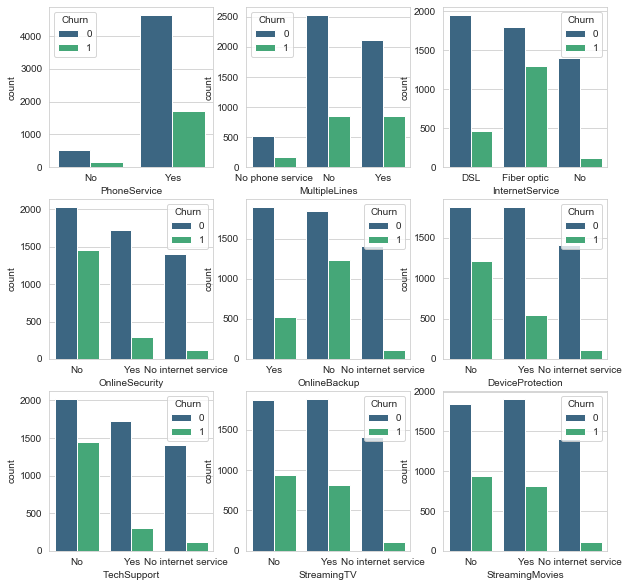

In [23]:
fig, axes= plt.subplots(nrows=3, ncols=3,figsize=(10,10))

sns.countplot(Churn['PhoneService'],hue=Churn['Churn'],palette='viridis',ax=axes[0][0])
sns.countplot(Churn['MultipleLines'],hue=Churn['Churn'],palette='viridis',ax=axes[0][1])
sns.countplot(Churn['InternetService'],hue=Churn['Churn'],palette='viridis',ax=axes[0][2])
sns.countplot(Churn['OnlineSecurity'],hue=Churn['Churn'],palette='viridis',ax=axes[1][0])
sns.countplot(Churn['OnlineBackup'],hue=Churn['Churn'],palette='viridis',ax=axes[1][1])
sns.countplot(Churn['DeviceProtection'],hue=Churn['Churn'],palette='viridis',ax=axes[1][2])
sns.countplot(Churn['TechSupport'],hue=Churn['Churn'],palette='viridis',ax=axes[2][0])
sns.countplot(Churn['StreamingTV'],hue=Churn['Churn'],palette='viridis',ax=axes[2][1])
sns.countplot(Churn['StreamingMovies'],hue=Churn['Churn'],palette='viridis',ax=axes[2][2])

plt.show()

Thus customers with fiber optic telephone service churn more.Also customers with no online security,online backup,Deviceprotection,Techsupport churm more than those having these services.Customers having Streaming tv and movies have almost same churn count as those not having these services.Therefore  Streaming tv and movies might not play a significant role in determining churning rate

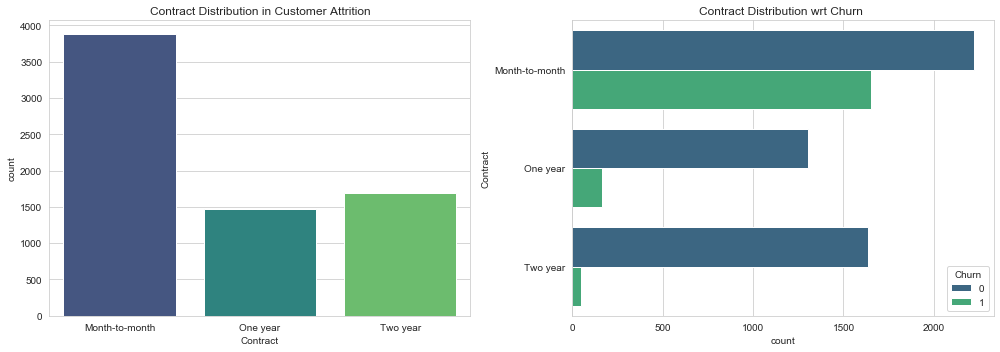

In [24]:
#Contract
fig, [ax1, ax2 ] = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
sns.countplot(Churn['Contract'],ax=ax1,palette='viridis')
ax1.title.set_text('Contract Distribution in Customer Attrition')
sns.countplot(y=Churn['Contract'],hue=Churn['Churn'],palette='viridis',ax=ax2)
ax2.title.set_text('Contract Distribution wrt Churn ')

plt.tight_layout()
plt.show()



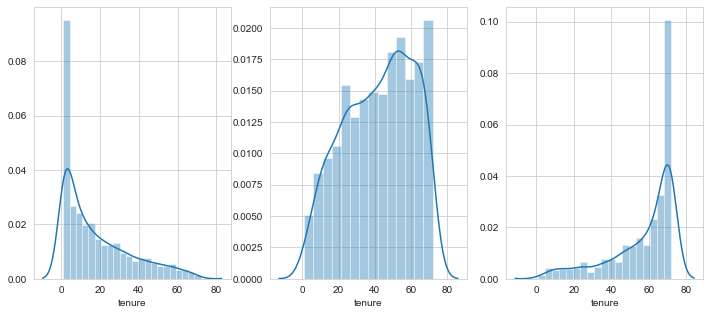

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,5))
sns.distplot(Churn[Churn['Contract']=='Month-to-month']['tenure'],ax=axes[0])
sns.distplot(Churn[Churn['Contract']=='One year']['tenure'],ax=axes[1])
sns.distplot(Churn[Churn['Contract']=='Two year']['tenure'],ax=axes[2])



More customers prefer month-to-month contracts.Customers with monthly contracts churn more than customers with yearly contracts.Company should focus on creating attractive yearly contracts and try to convince customers to take yearly plans

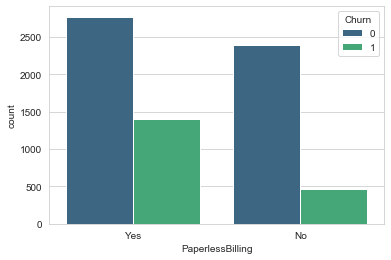

In [26]:
#Paperless billing system
sns.countplot(Churn['PaperlessBilling'],hue=Churn['Churn'],palette='viridis')

Churning rate of Paperless Billing is higher than Paper Billing.

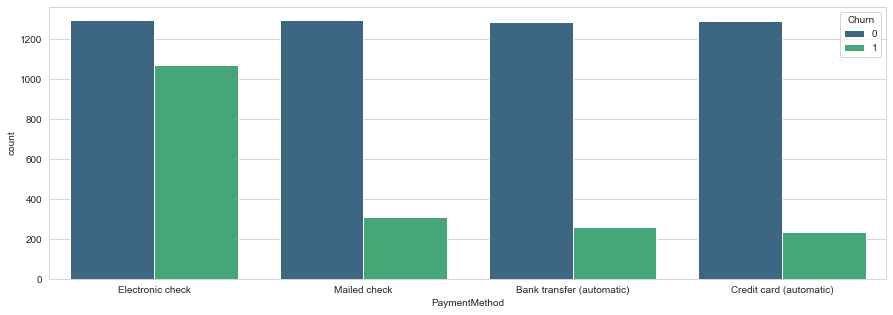

In [27]:
#PaymentMethod
plt.figure(figsize=(15,5))
sns.countplot(Churn['PaymentMethod'],hue=Churn['Churn'],palette='viridis')

Electronic check payment method has very high churning rate.Thus company needs to analyse the problems faced by the users using this system and thus try and improve it

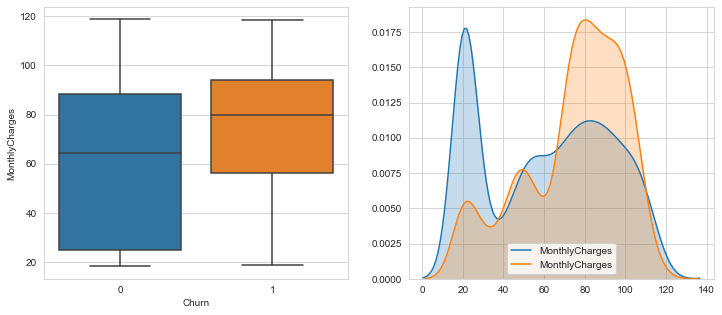

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.boxplot(y='MonthlyCharges',x='Churn',data=Churn,ax=axes[0])
sns.kdeplot(Churn[Churn['Churn']==0]['MonthlyCharges'],ax=axes[1],shade=True)
sns.kdeplot(Churn[Churn['Churn']==1]['MonthlyCharges'],ax=axes[1],shade=True)



Customers having high monthly charges tend to  churn more

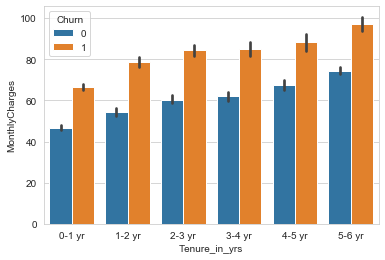

In [29]:
sns.barplot(x='Tenure_in_yrs',y='MonthlyCharges',hue='Churn',data=Churn,order=['0-1 yr','1-2 yr','2-3 yr','3-4 yr','4-5 yr','5-6 yr'])

Thus as tenure inceases monthy charges increases which inturn increases the churning rate.

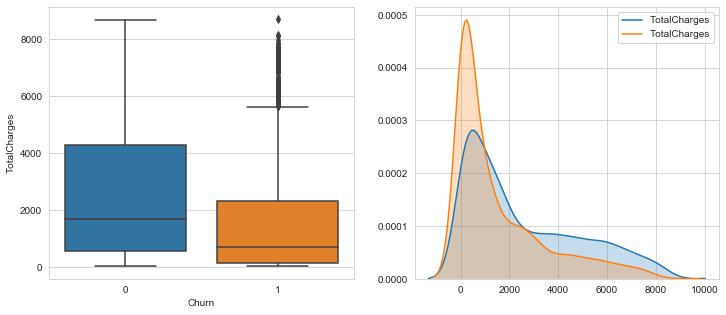

In [30]:
#Total charges
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,5))
sns.boxplot(y='TotalCharges',x='Churn',data=Churn,ax=axes[0])
sns.kdeplot(Churn[Churn['Churn']==0]['TotalCharges'],ax=axes[1],shade=True)
sns.kdeplot(Churn[Churn['Churn']==1]['TotalCharges'],ax=axes[1],shade=True)



Customers continuing for shorter period have low Total charges compared to customers which dont churn.

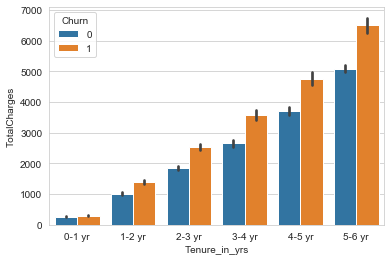

In [31]:
sns.barplot(x='Tenure_in_yrs',y='TotalCharges',hue='Churn',data=Churn,order=['0-1 yr','1-2 yr','2-3 yr','3-4 yr','4-5 yr','5-6 yr'])

Thus as tenure increases total charges increases which increases the churning rate.

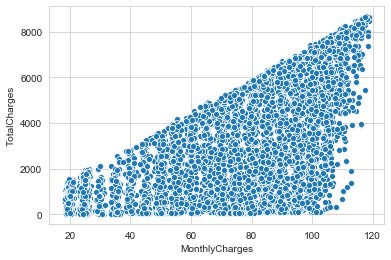

In [32]:
#Monthly charges vs Total charges
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=Churn)

Increase in monthly charge increases total charge.

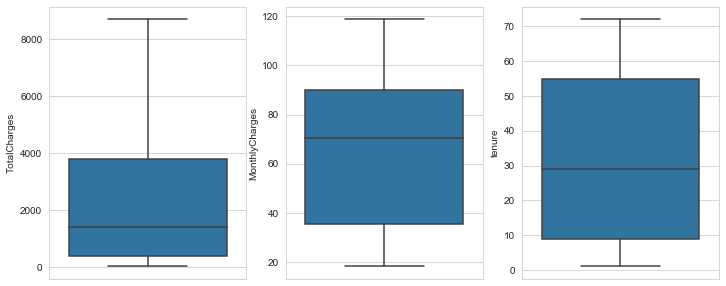

In [33]:
#Checking Outliers
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(12,5))
sns.boxplot(y='TotalCharges',data=Churn,ax=axes[0])
sns.boxplot(y='MonthlyCharges',data=Churn,ax=axes[1])
sns.boxplot(y='tenure',data=Churn,ax=axes[2])


Since there are no point beyond the whiskers we can say that there are no outliers

Conclusion:

1) Gender doesn't play an important role in predicting the churn rate

2)Senior citizens and Customers having no partners have a high churning rate and must be one of the focus point of company

3)When tenure is low churn rate is high.Also majority of customers  in 0-1 yrs tenure discontinue  their services whereas customers  5-6 yrs of tenure are loyal towards the copany.

4)Customers using Fiber optic internet service tend to churn more.Company should improve their high speed fiber optic internet service and analyse customer problems in this domain.

5)Customers not using services online security,online backup,Deviceprotection,Techsupport churn more than those having these services.Company should promote the use of these services among their customers.

6)Customers having monthly contracts churn more whereas customers having 2 yrs contract are more loyal towards the company.Thus company should promote their yearly plans more.

7)Customers using paperless billing systems churn more.The company should improve their online payment system or get customer feedback regarding this system.

8)Electronic check payment method has very high churning rate.Thus company needs to analyse the problems faced by the users using this system and thus try and improve it

9)As monthly charges and total charges increase customers churn more.Hence company must come up with better plans which meet the overal needs of its customers and inturn cause more customer aqisition



### Implement Machine Learning Models

In [34]:
#multi category columns
multi_cols=[]
for i in Churn.columns:
    if Churn[i].nunique()>=3 and Churn[i].nunique()<=6:
        multi_cols.append(i)
        
  

In [35]:
#binary columns
binary_cols=[]
for i in Churn.columns:
    if Churn[i].nunique()==2:
        binary_cols.append(i)
        

In [36]:
Churn=pd.get_dummies(Churn,columns=multi_cols)

Dropping multiple instances of the same column

In [37]:
Churn.drop(['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

In [38]:
#train validation split
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_val=train_test_split(Churn,test_size=3043/len(Churn),random_state=0)

In [40]:
#label encoding on binary columns
for i in  binary_cols:
    le=LabelEncoder()
    x_train[i]=le.fit_transform(x_train[i])
    x_val[i]=le.transform(x_val[i])

In [41]:
#correlation between features
plt.figure(figsize=(20,20))
x_train.corrwith(x_train.Churn).sort_values()

tenure                                    -0.346387
Contract_Two year                         -0.292077
Tenure_in_yrs_5-6 yr                      -0.219513
InternetService_No                        -0.219443
TotalCharges                              -0.197786
Contract_One year                         -0.180667
Dependents                                -0.166415
OnlineSecurity_Yes                        -0.156202
TechSupport_Yes                           -0.153858
PaymentMethod_Credit card (automatic)     -0.147242
Partner                                   -0.136895
PaymentMethod_Bank transfer (automatic)   -0.114838
InternetService_DSL                       -0.106938
Tenure_in_yrs_4-5 yr                      -0.098578
PaymentMethod_Mailed check                -0.087283
OnlineBackup_Yes                          -0.081011
Tenure_in_yrs_3-4 yr                      -0.068562
DeviceProtection_Yes                      -0.056033
Tenure_in_yrs_2-3 yr                      -0.042630
MultipleLine

<Figure size 1440x1440 with 0 Axes>

Since gender has very low correlation value with Churn drop gender 

In [42]:
x_train.drop('gender',axis=1,inplace=True)
x_val.drop('gender',axis=1,inplace=True)

In [43]:
#Scaling numerical columns
numerical_cols=['MonthlyCharges','TotalCharges','tenure']

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
ss=StandardScaler()
scaled_col=ss.fit_transform(x_train[numerical_cols])

In [46]:
scaled_val=ss.transform(x_val[numerical_cols])

In [47]:
test_ss=pd.DataFrame(data=scaled_val,columns=[numerical_cols])

In [48]:
train_ss=pd.DataFrame(data=scaled_col,columns=[numerical_cols])

In [49]:
x_train=x_train.reset_index(drop=True)

In [50]:
x_val=x_val.reset_index(drop=True)

In [51]:
x_train=x_train.merge(train_ss,on=x_train.index)

In [52]:
x_val=x_val.merge(test_ss,on=x_val.index)

In [53]:
x_val

,key_0,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,PaymentMethod_Mailed check,Tenure_in_yrs_0-1 yr,Tenure_in_yrs_1-2 yr,Tenure_in_yrs_2-3 yr,Tenure_in_yrs_3-4 yr,Tenure_in_yrs_4-5 yr,Tenure_in_yrs_5-6 yr,"(MonthlyCharges,)","(TotalCharges,)","(tenure,)"
0,0,5088-QZLRL,0,0,0,1,1,0,20.65,20.65,...,0,1,0,0,0,0,0,-1.461505,-0.992916,-1.272497
1,1,0787-LHDYT,0,0,0,16,1,1,20.60,330.25,...,0,0,1,0,0,0,0,-1.463168,-0.856618,-0.661614
2,2,8562-GHPPI,0,0,0,1,1,0,19.80,19.80,...,0,1,0,0,0,0,0,-1.489780,-0.993290,-1.272497
3,3,1334-FJSVR,0,0,0,1,0,1,24.25,24.25,...,0,1,0,0,0,0,0,-1.341752,-0.991331,-1.272497
4,4,3551-HUAZH,1,0,0,1,1,1,74.40,74.40,...,0,1,0,0,0,0,0,0.326476,-0.969253,-1.272497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,3038,2320-TZRRH,0,0,0,20,1,0,19.50,403.15,...,1,0,1,0,0,0,0,-1.499759,-0.824525,-0.498712
3039,3039,8071-SBTRN,0,0,0,70,1,1,111.15,7737.55,...,1,0,0,0,0,0,1,1.548956,2.404356,1.537566
3040,3040,6849-OYAMU,0,1,1,19,1,0,100.00,1888.65,...,0,0,1,0,0,0,0,1.178054,-0.170551,-0.539437
3041,3041,5857-TYBCJ,1,1,0,44,1,1,89.20,4040.20,...,0,0,0,0,1,0,0,0.818795,0.776643,0.478701


Creating X and y for model training

In [54]:
X_train=x_train.drop(['Churn','key_0','customerID'],axis=1)
X_train=X_train.drop(numerical_cols,axis=1)
y_train=x_train['Churn']

In [55]:
X_val=x_val.drop(['Churn','key_0','customerID'],axis=1)
X_val=X_val.drop(numerical_cols,axis=1)
y_val=x_val['Churn']

In [56]:
#class weights since dataset is imbalanced
from sklearn.utils import compute_class_weight

In [57]:
class_weights=compute_class_weight('balanced',np.unique(y_train),y_train)

Import evaluation metrics

In [84]:
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report

Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print('train_score',lr.score(X_train,y_train))
print('test_score',lr.score(X_val,y_val))

train_score 0.8094760591626974
test_score 0.807426881367072


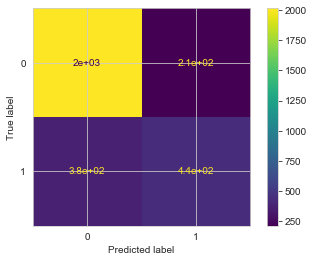

In [87]:
plot_confusion_matrix(estimator=lr,X=X_val,y_true=y_val)

In [88]:
print('Classification report',classification_report(lr.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2392
           1       0.54      0.68      0.60       651

    accuracy                           0.81      3043
   macro avg       0.72      0.76      0.74      3043
weighted avg       0.83      0.81      0.81      3043



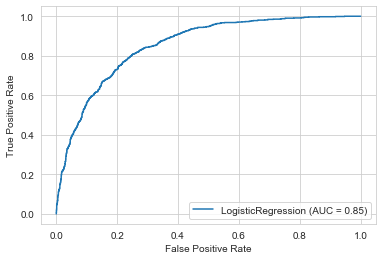

In [89]:
plot_roc_curve(estimator=lr,X=X_val,y=y_val)

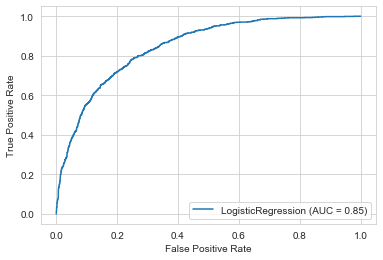

In [113]:
plot_roc_curve(estimator=lr,X=X_train,y=y_train)

Thus using logistic regression we get a train score of 80.94% and test score of 80.74%

KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
#Baseline model
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print('train_score',knn.score(X_train,y_train))
print('test_score',knn.score(X_val,y_val))

train_score 0.8373025821007771
test_score 0.7633913900755833


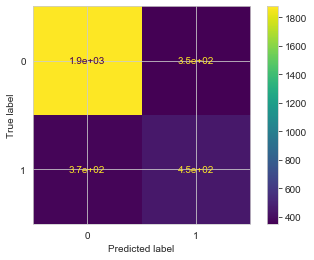

In [117]:
plot_confusion_matrix(estimator=knn,X=X_val,y_true=y_val)

In [118]:
print('Classification report',classification_report(knn.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2246
           1       0.55      0.56      0.55       797

    accuracy                           0.76      3043
   macro avg       0.69      0.70      0.70      3043
weighted avg       0.77      0.76      0.76      3043



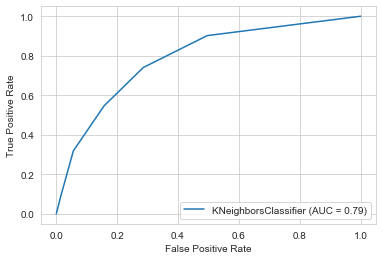

In [119]:
plot_roc_curve(estimator=knn,X=X_val,y=y_val)

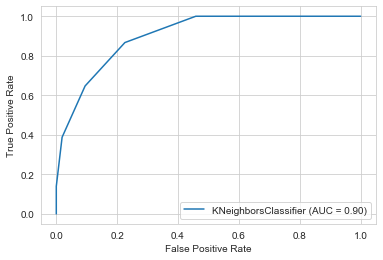

In [120]:
plot_roc_curve(estimator=knn,X=X_train,y=y_train)

2
train_score 0.8663825520180496
test_score 0.7591192901741702
3
train_score 0.8671346202055653
test_score 0.7614196516595465
5
train_score 0.8373025821007771
test_score 0.7633913900755833
6
train_score 0.8272750062672349
test_score 0.7840946434439697
7
train_score 0.8290298320381048
test_score 0.776536312849162
8
train_score 0.8245174229130108
test_score 0.7834373973052908
9
train_score 0.8177488092253697
test_score 0.7811370358199146
10
train_score 0.8182501880170469
test_score 0.7854091357213276
12
train_score 0.8167460516420155
test_score 0.786395004929346
13
train_score 0.8117322637252444
test_score 0.7831087742359514
14
train_score 0.8112308849335673
test_score 0.7831087742359514
15
train_score 0.8067184758084733
test_score 0.7817942819585935
20
train_score 0.8054650288292805
test_score 0.7926388432467959
25
train_score 0.8049636500376034
test_score 0.7962536970095301
30
train_score 0.8067184758084733
test_score 0.7988826815642458
35
train_score 0.8039608924542492
test_score 0.79

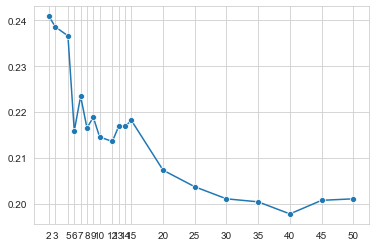

In [62]:
#Elbow method for best k selection
test_scr=[]
K=[2,3,5,6,7,8,9,10,12,13,14,15,20,25,30,35,40,45,50]
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(i)
    predict=knn.predict(X_val)
    test_scr.append(np.mean(predict!=y_val))
    print('train_score',knn.score(X_train,y_train))
    print('test_score',knn.score(X_val,y_val))
sns.lineplot(x=K,y=test_scr,markers=K,marker='o')
plt.xticks(K)
plt.show()

 The best k_neighbours according to elbow method is at k=15.

In [121]:
#model with best k
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
print('train_score',knn.score(X_train,y_train))
print('test_score',knn.score(X_val,y_val))

train_score 0.8067184758084733
test_score 0.7817942819585935


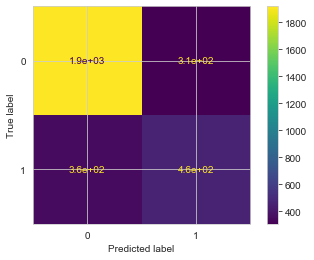

In [122]:
plot_confusion_matrix(estimator=knn,X=X_val,y_true=y_val)

In [123]:
print('Classification report',classification_report(knn.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.86      0.84      0.85      2276
           1       0.56      0.60      0.58       767

    accuracy                           0.78      3043
   macro avg       0.71      0.72      0.72      3043
weighted avg       0.79      0.78      0.78      3043



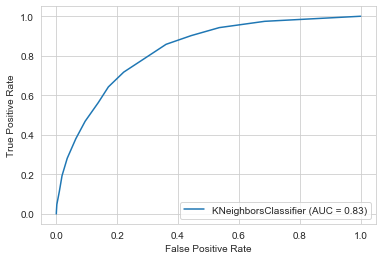

In [124]:
plot_roc_curve(estimator=knn,X=X_val,y=y_val)

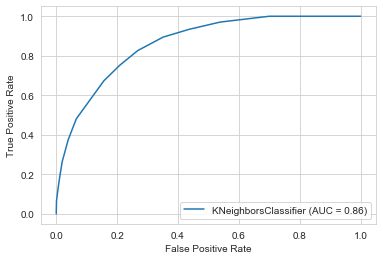

In [125]:
plot_roc_curve(estimator=knn,X=X_train,y=y_train)

Thus using knn we get a train score of 80% and test score of 78.17

Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score


In [102]:
#k fold
kfold=KFold(n_splits=5,random_state=0,shuffle=True)


In [126]:
#Baseline model
rf=RandomForestClassifier(class_weight={0:0.67909431,1:1.89591255})
rf.fit(X_train,y_train)
print('train_score',rf.score(X_train,y_train))
print('test_score',rf.score(X_val,y_val))

train_score 0.9974931060416145
test_score 0.786395004929346


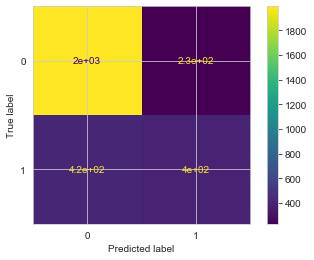

In [127]:
plot_confusion_matrix(estimator=rf,X=X_val,y_true=y_val)

In [128]:
print('Classification report',classification_report(rf.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.90      0.83      0.86      2416
           1       0.49      0.63      0.55       627

    accuracy                           0.79      3043
   macro avg       0.69      0.73      0.70      3043
weighted avg       0.81      0.79      0.80      3043



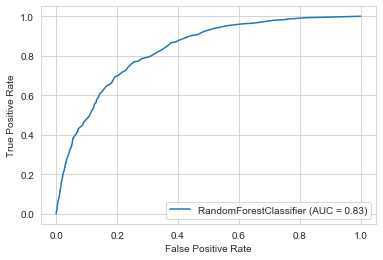

In [129]:
plot_roc_curve(estimator=rf,X=X_val,y=y_val)

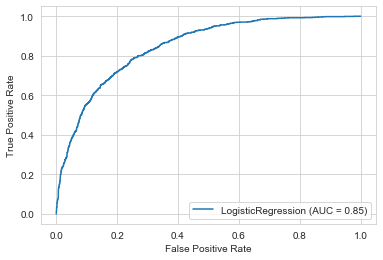

In [130]:
plot_roc_curve(estimator=lr,X=X_train,y=y_train)

Since model is overfitting data we need to select appropriate parameters and regularize

In [67]:
from sklearn.model_selection import GridSearchCV

In [166]:
dict={'max_depth':[3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20],'n_estimators':[200,300,400,500],'max_features':[3,4,5,7,8,9]}
gscv=GridSearchCV(RandomForestClassifier(class_weight={0:0.67909431,1:1.89591255}),param_grid=dict,n_jobs=5,verbose=0.02,scoring='roc_auc',cv=5)
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 408 candidates, totalling 2040 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   24.5s
[Parallel(n_jobs=5)]: Done 232 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 533 tasks      | elapsed:  5.2min
[Parallel(n_jobs=5)]: Done 955 tasks      | elapsed: 10.5min
[Parallel(n_jobs=5)]: Done 1498 tasks      | elapsed: 18.5min
[Parallel(n_jobs=5)]: Done 2040 out of 2040 | elapsed: 26.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.67909431,
                                                            1: 1.89591255},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                            

In [167]:
gscv.best_params_

{'max_depth': 6, 'max_features': 5, 'n_estimators': 500}

In [168]:
print('train_score',gscv.score(X_train,y_train))
print('test_score',gscv.score(X_val,y_val))

train_score 0.8723078501510169
test_score 0.8527315986323862


In [169]:
rf=RandomForestClassifier(max_depth=6,max_features=5,n_estimators=500,class_weight={0:0.67909431,1:1.89591255})
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.67909431, 1: 1.89591255},
                       criterion='gini', max_depth=6, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

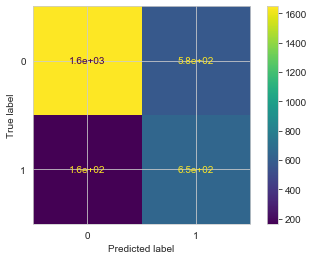

In [170]:
plot_confusion_matrix(estimator=rf,X=X_val,y_true=y_val)

In [171]:
print('Classification report',classification_report(rf.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.74      0.91      0.82      1812
           1       0.80      0.53      0.64      1231

    accuracy                           0.76      3043
   macro avg       0.77      0.72      0.73      3043
weighted avg       0.76      0.76      0.74      3043



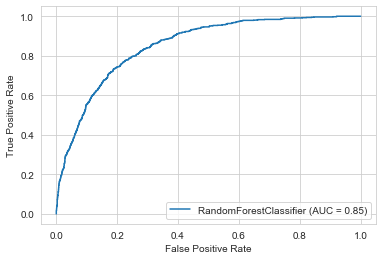

In [172]:
plot_roc_curve(estimator=rf,X=X_val,y=y_val)

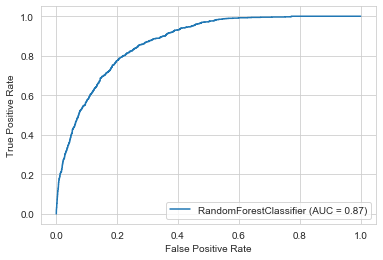

In [173]:
plot_roc_curve(estimator=rf,X=X_train,y=y_train)

In [72]:
rf.feature_importances_

array([0.01442433, 0.01306939, 0.0156182 , 0.00543298, 0.02551609,
       0.0120164 , 0.01128657, 0.01336209, 0.03993786, 0.0142679 ,
       0.04243136, 0.01228412, 0.02053024, 0.00996353, 0.01637529,
       0.00944166, 0.04960591, 0.01357397, 0.0101276 , 0.0117798 ,
       0.00978506, 0.01077709, 0.09643106, 0.02483012, 0.04532602,
       0.01006923, 0.01142681, 0.04088707, 0.00969961, 0.0376039 ,
       0.00711398, 0.00641375, 0.00635868, 0.00745814, 0.01794013,
       0.08642868, 0.10097043, 0.10943494])

AxesSubplot(0.125,0.125;0.775x0.755)


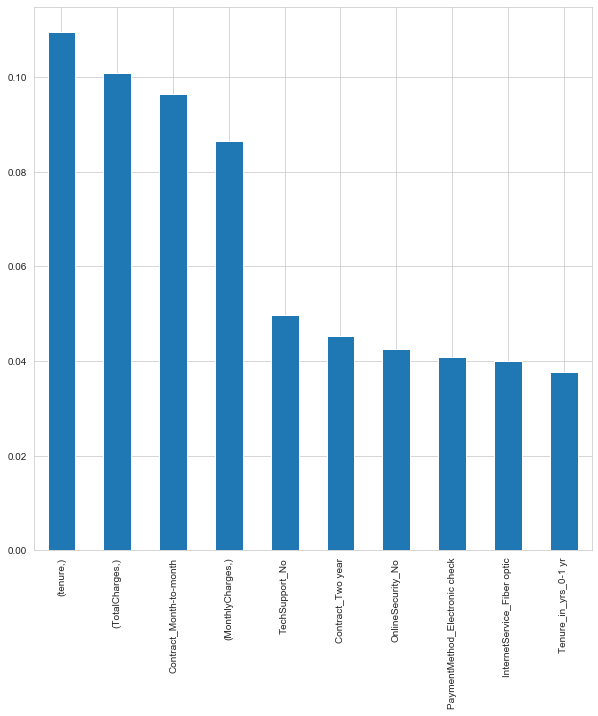

In [73]:
plt.figure(figsize=(10,10))
weights = pd.Series(rf.feature_importances_,
                 index=X_train.columns.values)


print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Best score using grid search cv and random forest is 87.23% on training data and 85.27% on validation set

Support Vector  Machine Classifier

In [147]:
from sklearn.svm import SVC

In [148]:
#svc baseline model
svm=SVC(class_weight={0:0.67909431,1:1.89591255})
svm.fit(X_train,y_train)
print('train_score',svm.score(X_train,y_train))
print('test_score',svm.score(X_val,y_val))

train_score 0.7718726497869141
test_score 0.7587906671048308


In [149]:
dict={'gamma':[0.001,0.01,0.1,1,10],'C':[10,20,40,50,100]}
gscv=GridSearchCV(SVC(class_weight={0:0.67909431,1:1.89591255}),param_grid=dict,n_jobs=5,verbose=0.02,scoring='roc_auc',cv=5)
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   20.1s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:   48.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight={0: 0.67909431, 1: 1.89591255},
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=5,
             param_grid={'C': [10, 20, 40, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0.02)

In [150]:
gscv.best_params_

{'C': 20, 'gamma': 0.001}

In [151]:
svc=SVC(C=20,gamma=0.001)
svc.fit(X_train,y_train)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [152]:
svc.score(X_train,y_train)

0.796690899974931

In [153]:
svc.score(X_val,y_val)

0.8008544199802826

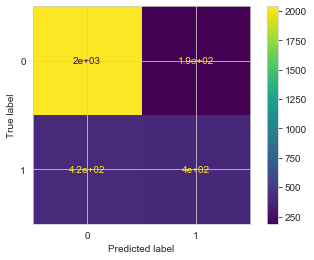

In [154]:
plot_confusion_matrix(estimator=svc,X=X_val,y_true=y_val)

In [155]:
print('Classification report',classification_report(svc.predict(X_val),y_val))

Classification report               precision    recall  f1-score   support

           0       0.92      0.83      0.87      2456
           1       0.49      0.68      0.57       587

    accuracy                           0.80      3043
   macro avg       0.70      0.75      0.72      3043
weighted avg       0.83      0.80      0.81      3043



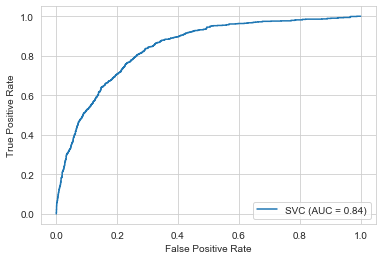

In [156]:
plot_roc_curve(estimator=svc,X=X_val,y=y_val)

In [3]:
plot_roc_curve(estimator=svc,X=X_train,y=y_train)

NameError: name 'plot_roc_curve' is not defined

After Grid Search test score=80% train score=79.66%

### Using Logistic Regresion For Further Evaluation

Since our model is unbalanced we need to evaluate our model using different techniques like confusion matrix ,roc curve ,classification report inorder to better evaluate our model.Considering all the above metrices Logistic Regression shows the best performance.

AxesSubplot(0.125,0.125;0.775x0.755)


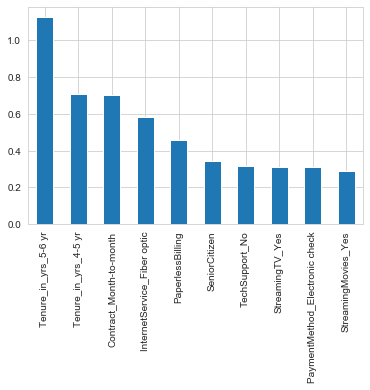

In [177]:
#Feature importance of top 10 positively related features
weights = pd.Series(lr.coef_[0],
                 index=X_train.columns.values)


print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


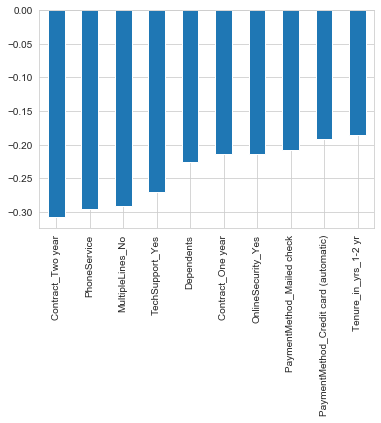

In [464]:
#Feature importance of top 10 negatively related features
weights = pd.Series(lr.coef_[0],
                 index=X_train.columns.values)


print (weights.sort_values(ascending = True)[:10].plot(kind='bar'))

In [191]:
bottom=weights.sort_values(ascending = True)[:10].index
top=weights.sort_values(ascending = False)[:10].index
b=[x for x in bottom]
t=[y for y in top]


In [4]:
#evaluating logistic regression only on the best 20 features
lr=LogisticRegression()
lr.fit(X_train[b+t],y_train)

NameError: name 'LogisticRegression' is not defined

In [194]:
lr.score(X_val[b+t],y_val)

0.8057837660203746

In [195]:
lr.score(X_train[b+t],y_train)

0.8092253697668589

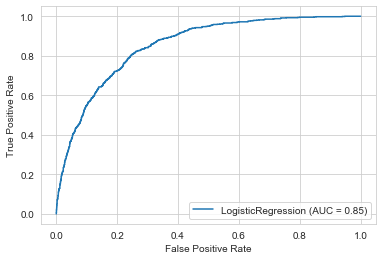

In [197]:
plot_roc_curve(estimator=lr,X=X_val[b+t],y=y_val)

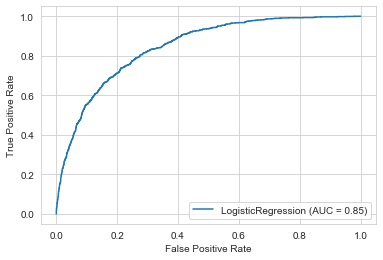

In [198]:
plot_roc_curve(estimator=lr,X=X_train[b+t],y=y_train)

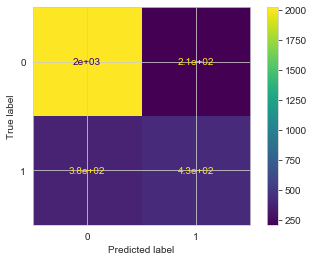

In [199]:
plot_confusion_matrix(estimator=lr,X=X_val[b+t],y_true=y_val)

In [200]:
print('Classification report',classification_report(lr.predict(X_val[b+t]),y_val))

Classification report               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2405
           1       0.53      0.68      0.59       638

    accuracy                           0.81      3043
   macro avg       0.72      0.76      0.73      3043
weighted avg       0.83      0.81      0.81      3043



Train score:80.57  |
Test score:80.92   |
AUC:0.85  |
precision:0.83  |
recall:0.81   |
f1-score:0.81   

### Final Conclusions

Tenure in 1-2 years having a negative coefficient for churn doesn't make sense because customers which are using the services for 5-6 years should be more loyal towards the company than those using the service just for 1-2 years.
Similary tenure 4-5 years having a positive cefficient with churn doesnt make sense.
The other coefficients make sense and can be validated using our graphical analysis.


##### Offers which company should make to which customers to encourage them to remain with company

1)Company should promote and focus on the marketing of  their additional services like online backup,online security,Tech support etc as these services will not only add to their revenue but decrease customer churn to a large extent.

2)Company should make attractive yearly plans and promote them well using emails and sms marketing  so that their monthy customers shift to these plans and churn due to monthly plans decrease.

3)Company should have efficient feedback system this will not only add to their data but help to understand the underlying reason behind customers discontinuing their fiber optic cable services, issues because of electronic payment method etc.They can also provide free Tech services for these issues initially.